In [1]:

import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from keras_preprocessing.image import load_img
from tqdm.notebook import tqdm

In [2]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features



In [19]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\dipan\.conda\envs\tfnew\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [3]:
def load_data(data_dir):
    X, y = [], []
    for emotion in os.listdir(data_dir):
        emotion_dir = os.path.join(data_dir, emotion)
        for img_file in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            # Preprocess the image (resize and normalize)
            img = cv2.resize(img, (48, 48))
            img = img / 255.0
            X.append(img.flatten())
            y.append(emotion)
    return np.array(X), np.array(y)

In [5]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

In [23]:
svm = SVC(kernel='linear')  # You can experiment with different kernels
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.35677894140956695


In [59]:
# from sklearn.metrics import confusion_matrix, classification_report



# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # Calculate precision, recall, and F1-score
# print(classification_report(y_test, y_pred))

# # Perform cross-validation
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(svm,   y_test,y_pred , cv=5)
# print("Cross-Validation Scores:", scores)
# print("Mean Cross-Validation Score:", scores.mean())



In [26]:
import joblib

# ... (rest of your code)

# Save the trained model
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

In [29]:
import joblib

# Load the saved model
loaded_model = joblib.load('svm_model.pkl')

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)

Matplotlib is building the font cache; this may take a moment.


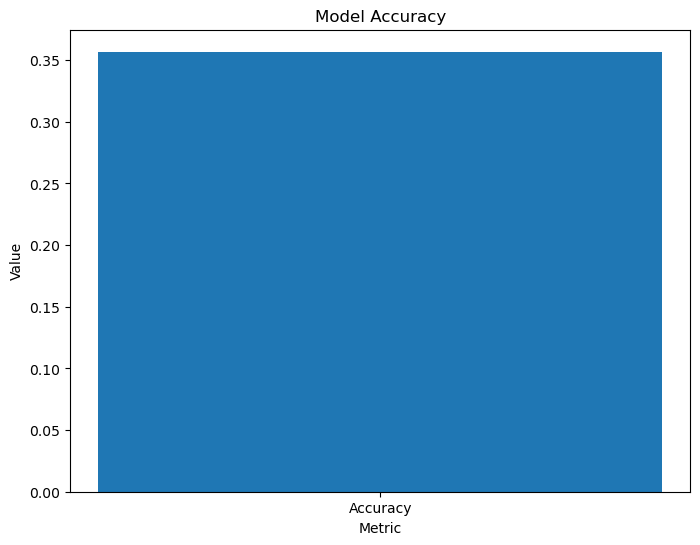

In [36]:
import matplotlib.pyplot as plt

# ... (rest of your code)

plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Accuracy')
plt.show()